#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 220524174

# Student name: Glenn Free

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [ ]:
import os
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import sklearn.decomposition
from sklearn.decomposition import PCA

source_dataset = pd.read_csv("clustering.csv")
features = source_dataset.iloc[:, 0:6]
Class = source_dataset.iloc[:,7:]


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

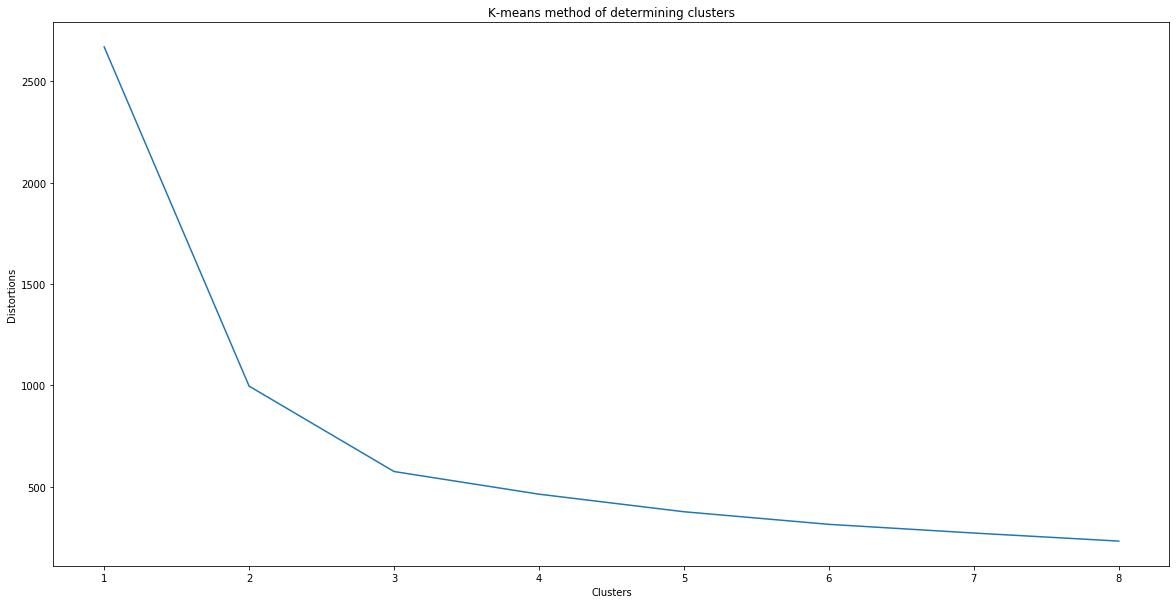

Result: The number of "useful" clusters is deemed to be 3 on K-means elbow method on features, shown below. This matches the actual number of classes in the dataset.


In [ ]:
distortions = []
Range = range(1,9)
for kmeans in Range:
    kcalc = KMeans(n_clusters=kmeans)
    kcalc.fit(features)
    distortions.append(kcalc.inertia_)

plt.figure(figsize=(20,10))
plt.plot(Range, distortions)
plt.xlabel('Clusters')
plt.ylabel('Distortions')
plt.title('K-means method of determining clusters')
plt.show()

print("Result: The number of \"useful\" clusters is deemed to be 3 on K-means elbow method on features, shown below. This matches the actual number of classes in the dataset.")

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [ ]:
#n_clusters has been chosen as 3 due to K-means elbow method determination made above
k = KMeans(n_clusters=3, random_state=1)
k.fit(features)
SquaredEuclidean_Class = k.labels_
pd.DataFrame(Class)['SquaredEuclidean_Class']=SquaredEuclidean_Class
GroupedMode = Class.groupby('Class').apply(pd.DataFrame.mode).reset_index(drop=True)

Computed_Cluster1 = max(Class.groupby('Class').get_group(0)['SquaredEuclidean_Class'].value_counts())
Computed_Cluster2 = max(Class.groupby('Class').get_group(1)['SquaredEuclidean_Class'].value_counts())
Computed_Cluster3 = max(Class.groupby('Class').get_group(2)['SquaredEuclidean_Class'].value_counts())

print("The computed cluster 1 contains: ", Computed_Cluster1)
print("The computed cluster 2 contains: ", Computed_Cluster2)
print("The computed cluster 3 contains: ", Computed_Cluster3)
print("Total data points across all clusters is: ", len(Class))
print("Purity is calculated as 1 /",len(Class), "*", Computed_Cluster1, "+", Computed_Cluster2, "+", Computed_Cluster3)

"{:.4f}".format((1/len(Class))*(Computed_Cluster1+Computed_Cluster2+Computed_Cluster3))

The computed cluster 1 contains:  60
The computed cluster 2 contains:  60
The computed cluster 3 contains:  68
Total data points across all clusters is:  210
Purity is calculated as 1 / 210 * 60 + 60 + 68


'0.8952'

4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. Hint: See the pyclustering library for python.
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [ ]:
#NOTES:
#Squared euclidean is KMeans function default selection, thus variable "SquaredEuclidean_Class"  is used in comparing distance metrics.
##########################################################################

#Euclidean
k_euclidean = KMedoids(n_clusters=3, random_state=1, metric='euclidean')
k_euclidean.fit(features)
Euclidean_Class = k_euclidean.labels_
pd.DataFrame(Class)['Euclidean_Class']=Euclidean_Class
E_Cluster1 = max(Class.groupby('Class').get_group(0)['Euclidean_Class'].value_counts())
E_Cluster2 = max(Class.groupby('Class').get_group(1)['Euclidean_Class'].value_counts())
E_Cluster3 = max(Class.groupby('Class').get_group(2)['Euclidean_Class'].value_counts())
print("Purity of Euclidean k-means clustering is", "{:.4f}".format((1/len(Class))*(E_Cluster1+E_Cluster2+E_Cluster3)))
      
#Minkowski
k_minkowski = KMedoids(n_clusters=3, random_state=1, metric='minkowski')
k_minkowski.fit(features)
Minkowski_Class = k_minkowski.labels_
pd.DataFrame(Class)['Minkowski_Class']=Minkowski_Class
M_Cluster1 = max(Class.groupby('Class').get_group(0)['Minkowski_Class'].value_counts())
M_Cluster2 = max(Class.groupby('Class').get_group(1)['Minkowski_Class'].value_counts())
M_Cluster3 = max(Class.groupby('Class').get_group(2)['Minkowski_Class'].value_counts())
print("Purity of Minkowski k-means clustering is", "{:.4f}".format((1/len(Class))*(M_Cluster1+M_Cluster2+M_Cluster3)))
      
#Chebyshev
k_chebyshev = KMedoids(n_clusters=3, random_state=1, metric='chebyshev')
k_chebyshev.fit(features)
Chebyshev_Class = k_chebyshev.labels_
pd.DataFrame(Class)['Chebyshev_Class']=Chebyshev_Class
C_Cluster1 = max(Class.groupby('Class').get_group(0)['Chebyshev_Class'].value_counts())
C_Cluster2 = max(Class.groupby('Class').get_group(1)['Chebyshev_Class'].value_counts())
C_Cluster3 = max(Class.groupby('Class').get_group(2)['Chebyshev_Class'].value_counts())
print("Purity of Chebyshev k-means clustering is", "{:.4f}".format((1/len(Class))*(C_Cluster1+C_Cluster2+C_Cluster3)))
      
#Manhattan
k_manhattan = KMedoids(n_clusters=3, random_state=1, metric='manhattan')
k_manhattan.fit(features)
Manhattan_Class = k_manhattan.labels_
pd.DataFrame(Class)['Manhattan_Class']=Manhattan_Class
Manh_Cluster1 = max(Class.groupby('Class').get_group(0)['Manhattan_Class'].value_counts())
Manh_Cluster2 = max(Class.groupby('Class').get_group(1)['Manhattan_Class'].value_counts())
Manh_Cluster3 = max(Class.groupby('Class').get_group(2)['Manhattan_Class'].value_counts())
print("Purity of Manhattan k-means clustering is", "{:.4f}".format((1/len(Class))*(Manh_Cluster1+Manh_Cluster2+Manh_Cluster3)))
print("")
print("For this particular dataset, k-means clustering using manhattan distance is most appropriate as the purity found is closest to ground truth")

Purity of Euclidean k-means clustering is 0.8905
Purity of Minkowski k-means clustering is 0.8905
Purity of Chebyshev k-means clustering is 0.8810
Purity of Manhattan k-means clustering is 0.9048

For this particular dataset, k-means clustering using manhattan distance is most appropriate as the purity found is closest to ground truth


5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [ ]:
source_array = source_dataset.values
arrayFeatures = source_array[:,0:7]
arrayClass = source_array[:,7]
##########################################################################
#ANOVA clustering
##########################################################################
anova_test = SelectKBest(score_func=f_classif, k=3)
anova_fit = anova_test.fit(arrayFeatures, arrayClass)
anova_features = anova_fit.transform(arrayFeatures)
#Find features by "print(anova_features[0:2,:])"
print("'height', 'length', and 'min' are the 3 best features per ANOVA")
AnovaFeatures_df = source_dataset[['height','length','min']]
Class_df = pd.DataFrame(arrayClass)

anova_k = KMeans(n_clusters=3, random_state=1)
anova_k.fit(AnovaFeatures_df)
Anova_Class = anova_k.labels_

k1 = KMeans(n_clusters=3, random_state=1)
k1.fit(AnovaFeatures_df)
Anova_Class = k1.labels_
pd.DataFrame(Class_df)['Anova_Class']=Anova_Class
GroupedMode1 = Class_df.groupby(Class_df[0]).apply(pd.DataFrame.mode).reset_index(drop=True)

Anova_1 = max(Class_df.groupby(Class_df[0]).get_group(0)['Anova_Class'].value_counts())
Anova_2 = max(Class_df.groupby(Class_df[0]).get_group(1)['Anova_Class'].value_counts())
Anova_3 = max(Class_df.groupby(Class_df[0]).get_group(2)['Anova_Class'].value_counts())

print("ANOVA computed cluster 1 contains:", Anova_1)
print("ANOVA computed cluster 2 contains:", Anova_2)
print("ANOVA computed cluster 3 contains:", Anova_3)
print("Purity on ANOVA method is:", "{:.2f}".format((1/len(Class_df))*(Anova_1+Anova_2+Anova_3)))
##########################################################################
#Chi-squared method
##########################################################################

chi_test = SelectKBest(chi2, k = 3) 
chi_fit = chi_test.fit_transform(arrayFeatures, arrayClass)
#print(chi_fit[0:1])
print("")
print("'height', 'length', and 'max' are the 3 best features per chi-squared")
chi_df = source_dataset[['height','length','max']]
chi_k = KMeans(n_clusters=3, random_state=1)
chi_k.fit(chi_df)
Chi_Class = chi_k.labels_

k2 = KMeans(n_clusters=3, random_state=1)
k2.fit(chi_df)
Chi_Class = k2.labels_
pd.DataFrame(Class_df)['Chi_Class']=Chi_Class
GroupedMode2 = Class_df.groupby(Class_df[0]).apply(pd.DataFrame.mode).reset_index(drop=True)

Chi_1 = max(Class_df.groupby(Class_df[0]).get_group(0)['Chi_Class'].value_counts())
Chi_2 = max(Class_df.groupby(Class_df[0]).get_group(1)['Chi_Class'].value_counts())
Chi_3 = max(Class_df.groupby(Class_df[0]).get_group(2)['Chi_Class'].value_counts())

print("Chi-square computed cluster 1 contains:", Chi_1)
print("Chi-square computed cluster 2 contains:", Chi_2)
print("Chi-square computed cluster 3 contains:", Chi_3)
print("Purity on Chi-square method is:", "{:.2f}".format((1/len(Class_df))*(Chi_1+Chi_2+Chi_3)))
print("")
print("RECOMMENDATION:")
print("The feature set recommended is 'length', 'height' and 'max', as selected by chi-square method.")
print("The recommendation is based on chi-square method returning a higher purity to ANOVA when compared against ground truth.")

'height', 'length', and 'min' are the 3 best features per ANOVA
ANOVA computed cluster 1 contains: 52
ANOVA computed cluster 2 contains: 55
ANOVA computed cluster 3 contains: 70
Purity on ANOVA method is: 0.84

'height', 'length', and 'max' are the 3 best features per chi-squared
Chi-square computed cluster 1 contains: 60
Chi-square computed cluster 2 contains: 60
Chi-square computed cluster 3 contains: 68
Purity on Chi-square method is: 0.90

RECOMMENDATION:
The feature set recommended is 'length', 'height' and 'max', as selected by chi-square method.
The recommendation is based on chi-square method returning a higher purity to ANOVA when compared against ground truth.


# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

Dimensionality variance captured: [ 72.14  89.11  99.56  99.89  99.98 100.  ]
2 is the minimum count of principal components which capture at least 89% variance.
3 is the minimum count of principal components which capture at least 99% variance.


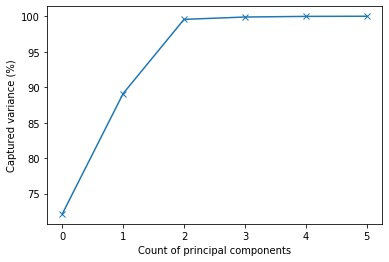

In [ ]:
normalised = scale(features)
components = PCA(n_components=6)
components.fit(normalised)
pca_variance=np.cumsum(np.round(components.explained_variance_ratio_, decimals=4)*100)
print("Dimensionality variance captured:",pca_variance)
plt.plot(pca_variance, marker='o', ls = '--')

plt.xlabel("Count of principal components")
plt.ylabel("Captured variance (%)")
print("2 is the minimum count of principal components which capture at least 89% variance.")
print("3 is the minimum count of principal components which capture at least 99% variance.")

2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

The purity of clusters formed by 2 principal components is: 90.0 %
The purity of clusters formed by 3 principal components is: 89.52 %

FINDINGS:
The line chart shows the relationship between purity and captured variance. The conclusion drawn from this chart is
that cluster purity of the dataset is not significantly impacted by as a result of dimensionality reduction.


Text(0.5, 1.0, 'Purity (%) by captured variance')

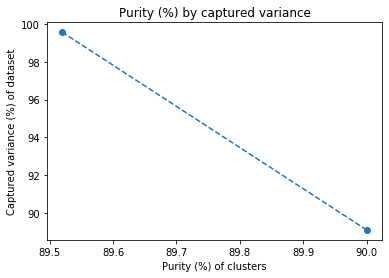

In [ ]:
#Assumption: elbow method has been used to determine that number of clusters is 3 on both reduced datasets.
#Assumption: I have interpreted the question to call for  principal components of 'at least' 89% and 99%, rather than exactly those values.
pca_2 = PCA(n_components=2) #At least 89%
pca_3 = PCA(n_components=3) #At least 99%
components_2 = pca_2.fit_transform(normalised)
components_3 = pca_3.fit_transform(normalised)
pca_variance2=np.cumsum(np.round(pca_2.explained_variance_ratio_, decimals=4)*100)
pca_variance3=np.cumsum(np.round(pca_3.explained_variance_ratio_, decimals=4)*100)
#######################################################
#2 components
#######################################################

k_pca2= KMeans(n_clusters=3, random_state=1)
k_pca2.fit(components_2)
PCA_2_Class = k_pca2.labels_
pd.DataFrame(Class)['PCA_2_Class']=PCA_2_Class
GroupedMode_pca2 = Class.groupby('Class').apply(pd.DataFrame.mode).reset_index(drop=True)

Computed_Cluster1_pca2 = max(Class.groupby('Class').get_group(0)['PCA_2_Class'].value_counts())
Computed_Cluster2_pca2 = max(Class.groupby('Class').get_group(1)['PCA_2_Class'].value_counts())
Computed_Cluster3_pca2 = max(Class.groupby('Class').get_group(2)['PCA_2_Class'].value_counts())
purity_pca2 = float(("{:.4f}".format((1/len(Class))*(Computed_Cluster1_pca2+Computed_Cluster2_pca2+Computed_Cluster3_pca2))))*100
print("The purity of clusters formed by 2 principal components is:", purity_pca2,"%")
#######################################################
#3 components
#######################################################

k_pca3= KMeans(n_clusters=3, random_state=1)
k_pca3.fit(components_3)
PCA_3_Class = k_pca3.labels_
pd.DataFrame(Class)['PCA_3_Class']=PCA_3_Class
GroupedMode_pca3 = Class.groupby('Class').apply(pd.DataFrame.mode).reset_index(drop=True)

Computed_Cluster1_pca3 = max(Class.groupby('Class').get_group(0)['PCA_3_Class'].value_counts())
Computed_Cluster2_pca3 = max(Class.groupby('Class').get_group(1)['PCA_3_Class'].value_counts())
Computed_Cluster3_pca3 = max(Class.groupby('Class').get_group(2)['PCA_3_Class'].value_counts())
purity_pca3 = float(("{:.4f}".format((1/len(Class))*(Computed_Cluster1_pca3+Computed_Cluster2_pca3+Computed_Cluster3_pca3))))*100
print("The purity of clusters formed by 3 principal components is:", purity_pca3,"%")
print("")
print("FINDINGS:")
print("The line chart shows the relationship between purity and captured variance. The conclusion drawn from this chart is")
print("that cluster purity of the dataset is not significantly impacted by as a result of dimensionality reduction.")
plt.plot([purity_pca2, purity_pca3], [pca_variance2[1], pca_variance3[2]], marker = 'o', ls = '--')
plt.xlabel("Purity (%) of clusters")
plt.ylabel("Captured variance (%) of dataset")
plt.title('Purity (%) by captured variance')

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

In [ ]:
print('\033[1m' + '\033[4m' + "Answer: PCA can be applied effectively on linear datasets, but is not appropriate curved structural datasets.")
print("")
print('\033[1m' + '\033[4m' + "Justification:" + '\033[0m')
print("")
print("> The application of PCA results in orthogonal principal components; a dimensionality-reduced dataset which")
print("maintains as much variation of the dataset as possible.")
print("")
print("> Intuitively, dimensionality reduction can occur where one feature of a dataset is described by another")
print("(i.e. there is a direction/linear correlation.")
print("")
print("> In practice, dimensionality reduction occurs by finding the line of best fit in a dataset where variance is maximum,")
print("and the error/distance is minimum.")
print("")
print("> On a line of best fit this method is appropriate, however on a curved structural dataset, PCA cannot accurately be applied as")
print("there is no representative 'direction', and the measure of error/distance from any best-fit line is distorted")

Answer: PCA can be applied effectively on linear datasets, but is not appropriate curved structural datasets.

Justification:

> The application of PCA results in orthogonal principal components; a dimensionality-reduced dataset which
maintains as much variation of the dataset as possible.

> Intuitively, dimensionality reduction can occur where one feature of a dataset is described by another
(i.e. there is a direction/linear correlation.

> In practice, dimensionality reduction occurs by finding the line of best fit in a dataset where variance is maximum,
and the error/distance is minimum.

> On a line of best fit this method is appropriate, however on a curved structural dataset, PCA cannot accurately be applied as
there is no representative 'direction', and the measure of error/distance from any best-fit line is distorted


The purity of clusters formed by 2 principal components is: 0.8952
